# Belarus Car Price Prediction

The aim of this project is to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set the of variables that has most impact on the car price.

The dataset has been taken from kaggle. It has 56244 rows and 12 columns


#### Data Dictionary


| Variable | Description |
| --- | --- |
| make| machine firm |
| model| machine model |
|price USD| price in USD (target variable)|
| year| year of production|
| condition| represents the condition at the sale moment (with mileage, for parts, etc)|
| mileage| mileage in kilometers|
| fuel type| type of the fuel (electro, petrol, diesel)|
| volume(cm3)| volume of the engine in cubic centimeters|
| color| color of the car|
| transmission| type of transmission|
| drive unit| drive unit|
| segment| segment of the car|

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## Data PreProcessing Part 

In [3]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [4]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [7]:
# Checking the shape of the dataset
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [8]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)

In [9]:
# Unique values in the columns
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [10]:
# Unqiue car make
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are you many car make, and it is difficult to analyze them individually, so I will group them into categories : Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other. The grouping is based on the car make and the country of origin.

In [11]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

In [12]:
# Descriptive Statistic

df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [13]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


## Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

### Car Make Segment

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\1096634217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts(), palette=['#4CAF50', "#FF9800", "#2196F3", "#9C27B0", "#E91E63", "#FFFF00" ,"#FF0000"])


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

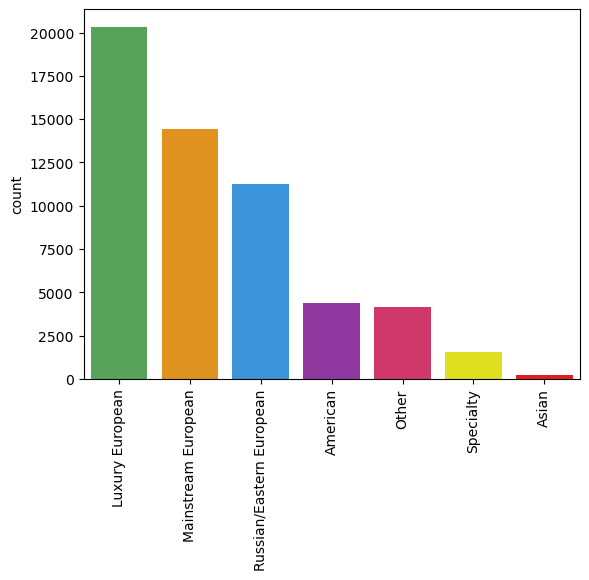

In [21]:
sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts(), palette=['#4CAF50', "#FF9800", "#2196F3", "#9C27B0", "#E91E63", "#FFFF00" ,"#FF0000"])
plt.xticks(rotation=90)

In the dataset, most of the cars are european (particulary majority of the are Luxury
followed by Mainstream and Russian/Eastern European). However the dataset also has
american as well asian cars. There are also some speciality cars such as Tesla, McLaren,
Bentley, etc. The dataset also has some cars that are not categorized into any of the
above categories.

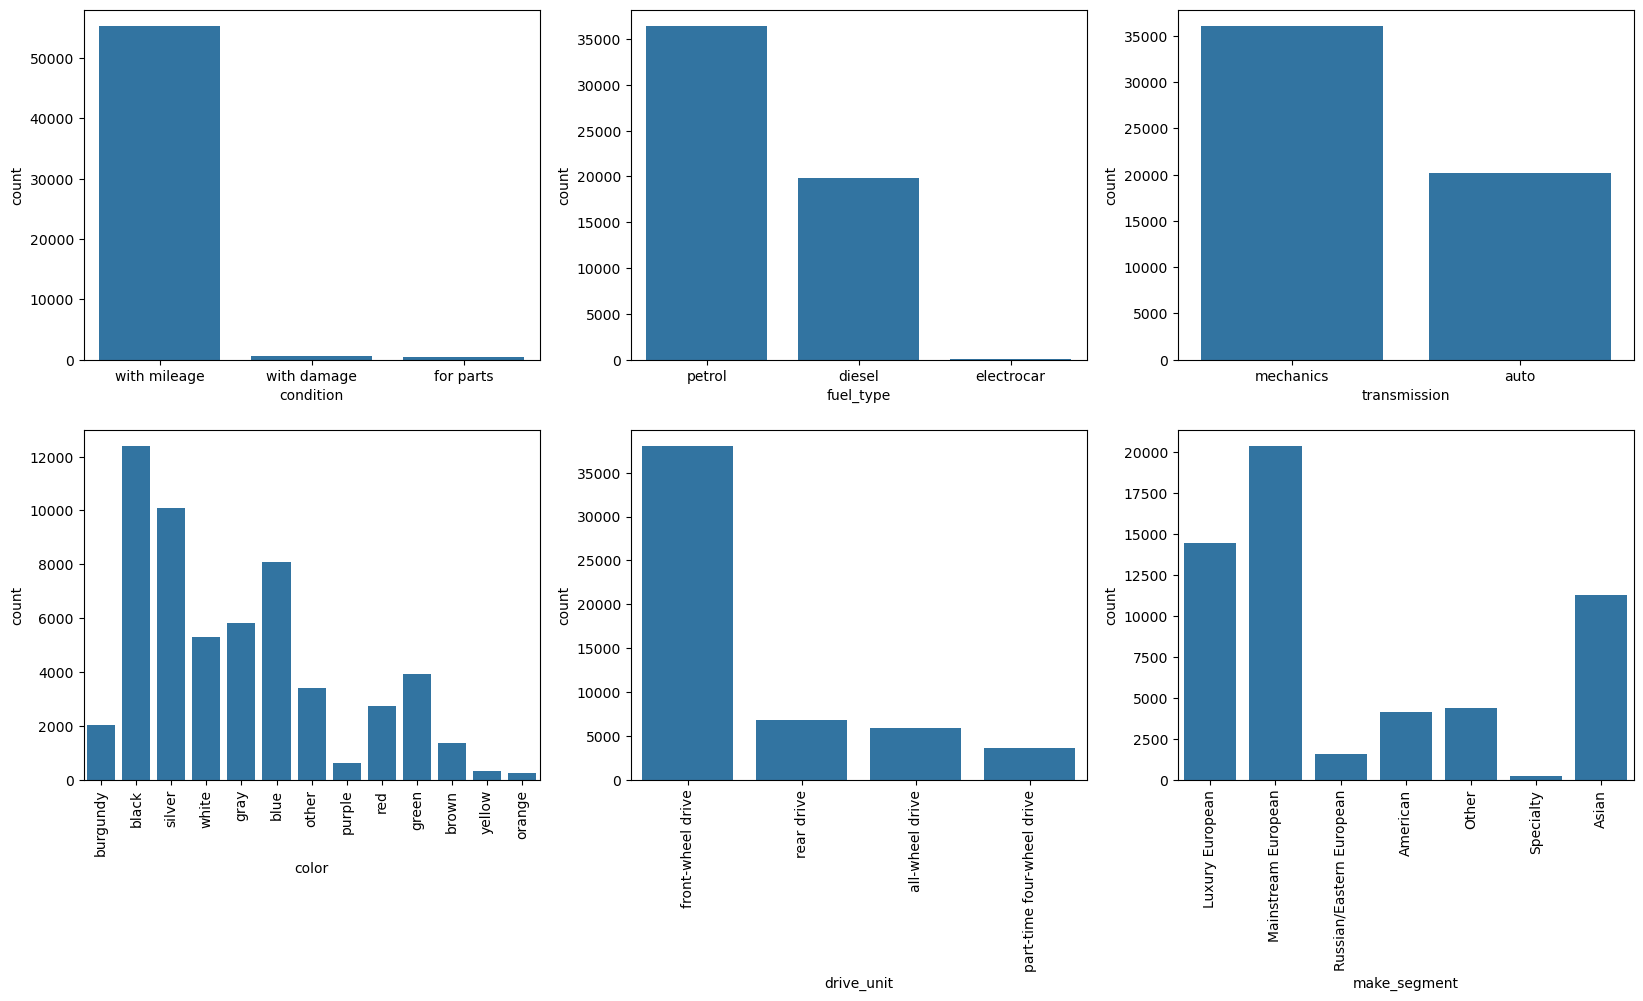

In [30]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

The figure shows six bar charts arranged in a 2x3 grid layout, visualizing various attributes of cars in a dataset. Here is a breakdown of each chart:

1. **Top Left Plot - Car Condition (`condition`)**:
- **Categories**: 'with mileage', 'with damage', 'for parts'.
- **Observation**: Most cars are categorized as 'with mileage', meaning these cars have been used but are still in running condition. Very few cars are listed as 'with damage' or 'for parts', indicating these categories are less common in the dataset.

2. **Top Middle Plot - Fuel Type (`fuel_type`)**:
- **Categories**: 'petrol', 'diesel', 'electric car'.
- **Observation**: 'petrol' is the dominant fuel type, followed by 'diesel'. 'Electrocar' (electric car) is very rare in the dataset, indicating low adoption or availability of electric vehicles.

3. **Top Right Plot - Transmission Type (`transmission`)**:
- **Category**: 'mechanical' (manual), 'automatic' (automatic).
- **Observation**: Cars with manual transmission (`mechanical') are more common than cars with automatic transmission (`automatic'), indicating a greater preference or availability of manual cars in the dataset.

4. **Bottom Left Plot - Car Color (`color`)**:
- **Category**: Various colors such as 'black', 'silver', 'white', 'grey', 'blue', etc.
- **Observation**: 'Black' is the most popular car color, followed by 'silver' and 'white'. There are a variety of colors, but some colors such as 'yellow', 'brown', and 'orange' are much less common.

5. **Bottom Middle Plot - Drive Unit (`drive_unit`)**:
- **Categories**: 'front-wheel drive', 'rear-drive', 'all-wheel drive', 'part-time four-wheel drive'.
- **Observation**: 'Front-wheel drive' is the dominant drive unit type, far surpassing 'rear-drive', 'all-wheel drive', and 'part-time four-wheel drive'. This indicates a preference or higher production of front-wheel drive cars.

6. **Bottom Right Plot - Market Segment (`make_segment`)**:
- **Categories**: 'Luxury Europe', 'Mainstream Europe', 'Russia/Eastern Europe', 'Americas', 'Other', 'Specialty', 'Asia'.
- **Observation**: 'Mainstream Europe' cars dominate the dataset, followed by the 'Luxury Europe' and 'Asia' segments. ‘Russia/Eastern Europe’, ‘America’, ‘Special’ and ‘Other’ are under-represented, indicating fewer cars in these segments.

### General Insights:
- The dataset primarily consists of used cars (‘with mileage’) with the majority being petrol-powered and having a manual transmission.
- The most popular car colours are neutral colours such as ‘black’, ‘silver’ and ‘white’.
- Front-wheel drive cars are most common, in line with their common use across many car models.
- European cars, particularly those in the ‘Premium’ and ‘Luxury’ segments, dominate the dataset, highlighting their significant market presence.

This plot provides an overview of the characteristics of the cars in the dataset, offering insights into market trends and consumer preferences.

### Continuos Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

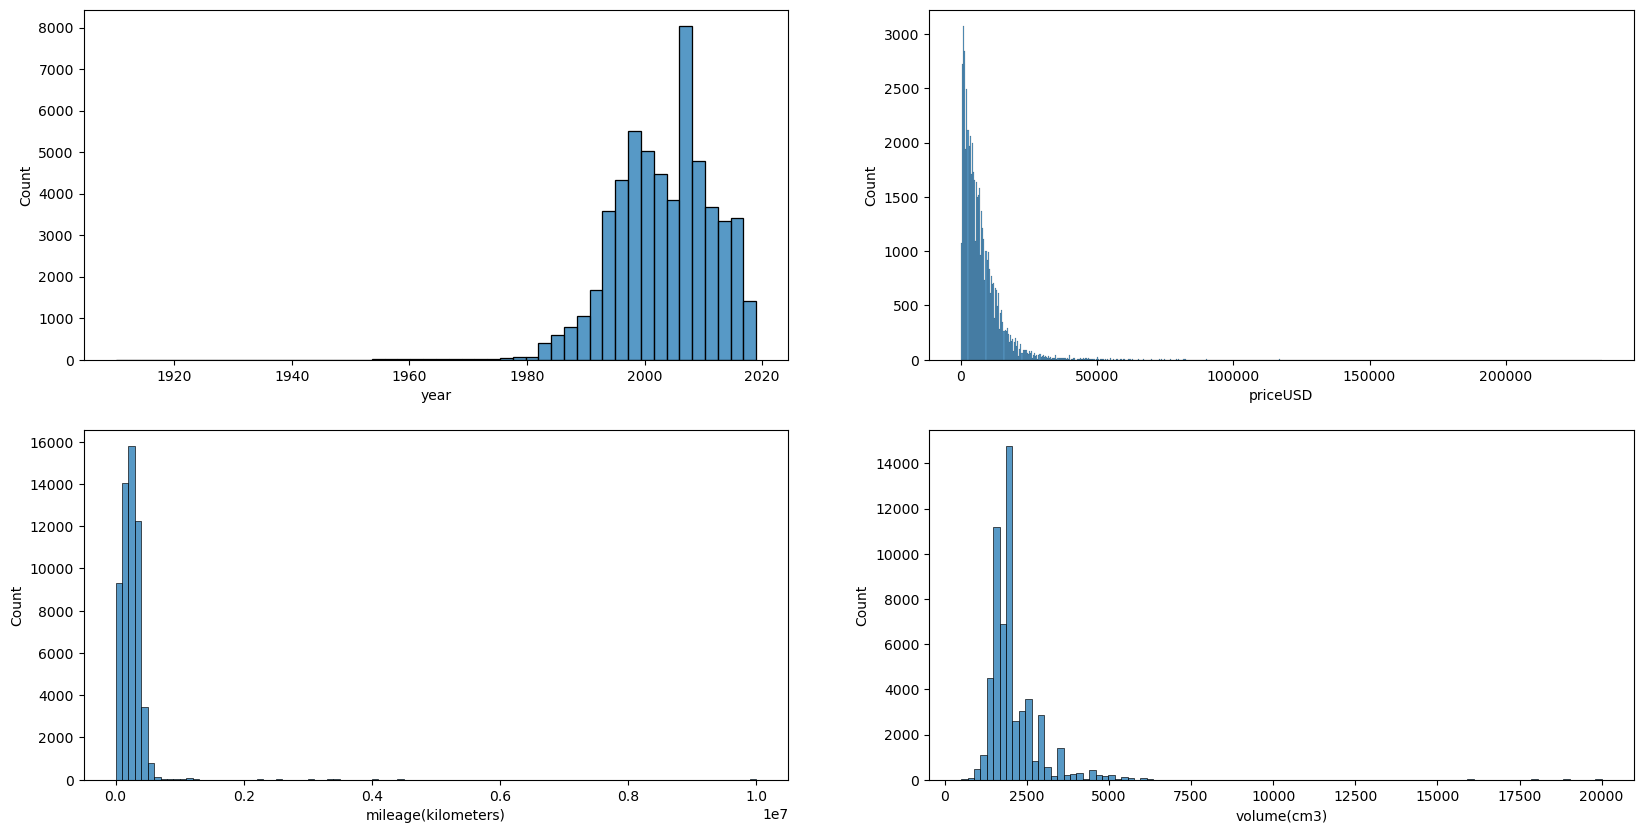

In [31]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

This chart shows the distribution of various features in the car dataset. Here’s a breakdown of each:

**Condition:** Most cars are listed as “with miles,” followed by “with damage” and only a few cars are listed as “for parts.”

**Fuel Type:** The majority of cars listed run on gasoline, followed by diesel cars, with a very small number of electric cars.

**Transmission:** Most cars run on mechanical transmissions, followed by automatic transmissions.

**Color:** The most common car colors are black and gray, followed by silver, white, and blue. Other colors like red, green, and brown are less common.

**Drivetrain:** Most cars are front-wheel drive, followed by rear-wheel drive, and fewer cars are all-wheel drive and part-time four-wheel drive.  

**Make Segment:** Most cars are listed as “Luxury European,” followed by “Mainstream European,” and “Russian/Eastern European.” The “American,” “Other,” “Specialty,” and “Asian” segments are much smaller.

In [32]:
df = df[df["year"]>1980]

### Price and Make

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\3200978141.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='make', x='priceUSD', data=demodf, palette = colors)


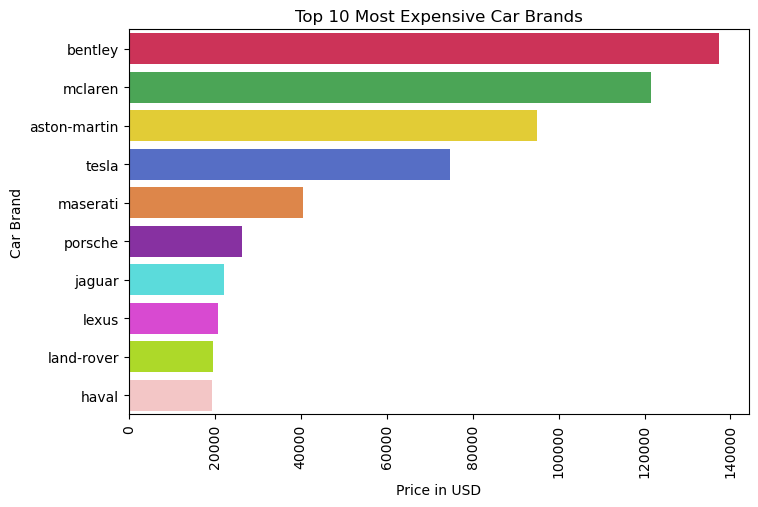

In [35]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf, palette = colors)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

### Price and Condition

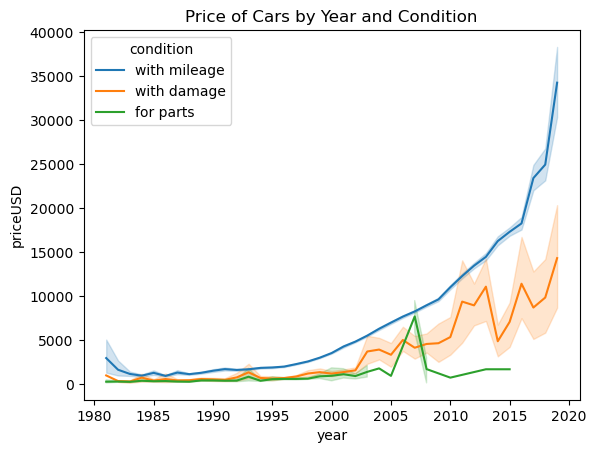

In [36]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with
selling codition of the car. Cars, which are sold in working condition, are more expensive
and their price increased with time, having exponential increase between 2015 to 2020.
Cars, which were damaged, had a similar price to tha cars which were sold for parts
between 1980 to 2000. However, the price of the damaged cars increased significanlty
after 2000. Cars, which were sold for parts, tend to have minimal price and their price
increased very little with time.
The cars running on petrol and diesel have similar mileage, however their prices are quite
different. The cars running on petrol tend to have higher price than the diesel ones. The
cars running on electricity tend to have very high prices and low mileage.

### Price and Transmission

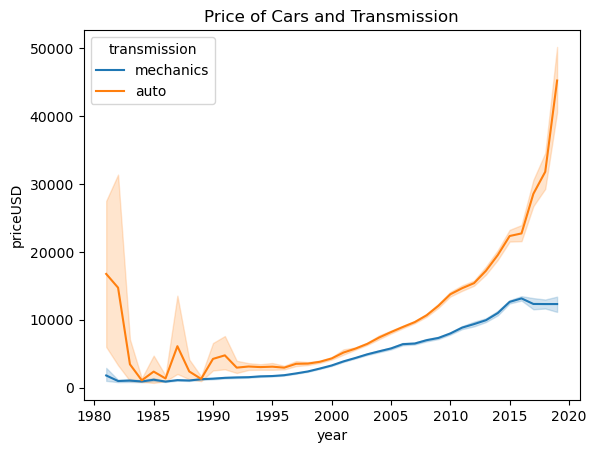

In [37]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of
the cars with automatic transmission decreased significantly after 1983, however its price
increased exponentially after 2000. However, the price of the cars with manual
transmission is always less than the cars with automatic transmission showing similar
increase in price after 2000.

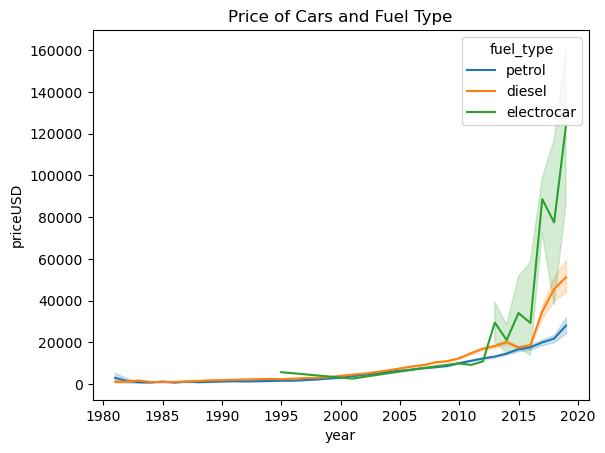

In [38]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Till 2005, there was no major difference in car price of cars running on petrol and diesel.
However, after 2015, the price of the cars running on petrol increased significantly,
whereas the price of the cars running on diesel increased with a very small margin. The
graph also highloghts the introducttion of electro cars, which runs on electricity in 1995.
However, the price of the electro cars increases exponentially after 2015, having the
highest car price based on fuel type

### Price and Drive Unit

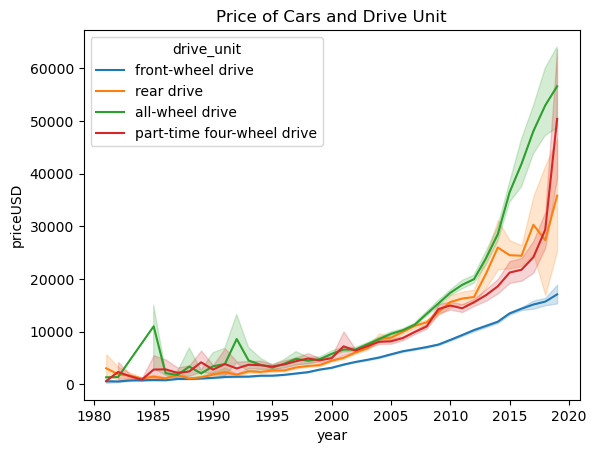

In [39]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 to 1995, there was not much difference in the price of the cars based on
the drive unit. However after 1995, the price of the cars with front wheel drive increased
at a slower pace as compared to other drive units. The price of the cats with all wheel
drive increased significantly after 2005, having the highest price among all the drive
units, followed by part-time four wheel drive and rear wheel drive.


### Price and Brand Segment


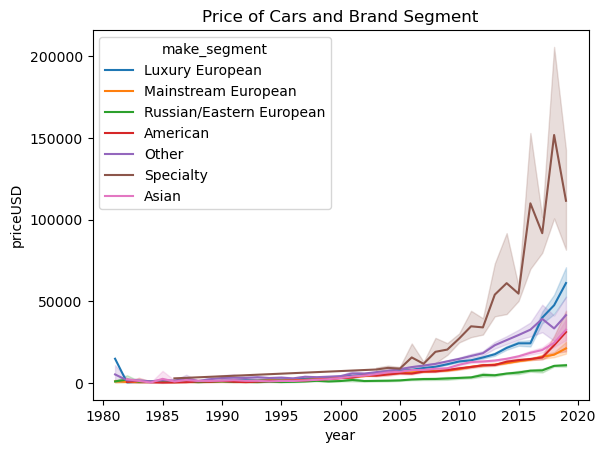

In [40]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

This graph shows the surge in car prices after 2005, where we can seen that the price of
the specialty car segment increased significanlty followed by the luxury european car,
American, Asian and Mainstream European car segment. The price of the Russian/Eastern
European car segment increased at a slower pace as compared to other segments and is
lowest among all the segments.

## Data PreProcessing Part 2

In [41]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

Since, the count of null values in small in comparison to that dataset size, I will be
dropping the null values from the dataset.

In [42]:
df.dropna(inplace=True)

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [43]:
df.drop(columns=['make'], inplace=True)

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\1999857455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['make'], inplace=True)


### Label encoding for object data type

In [46]:
from sklearn.preprocessing import LabelEncoder
# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']
# Label encoding Object
le = LabelEncoder()
#label encoding for each column
for col in cols:
 le.fit(df[col])
 df[col] = le.transform(df[col])
 print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\2763599424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\2763599424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\2763599424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

### Correlation Matrix Heatmap

<Axes: >

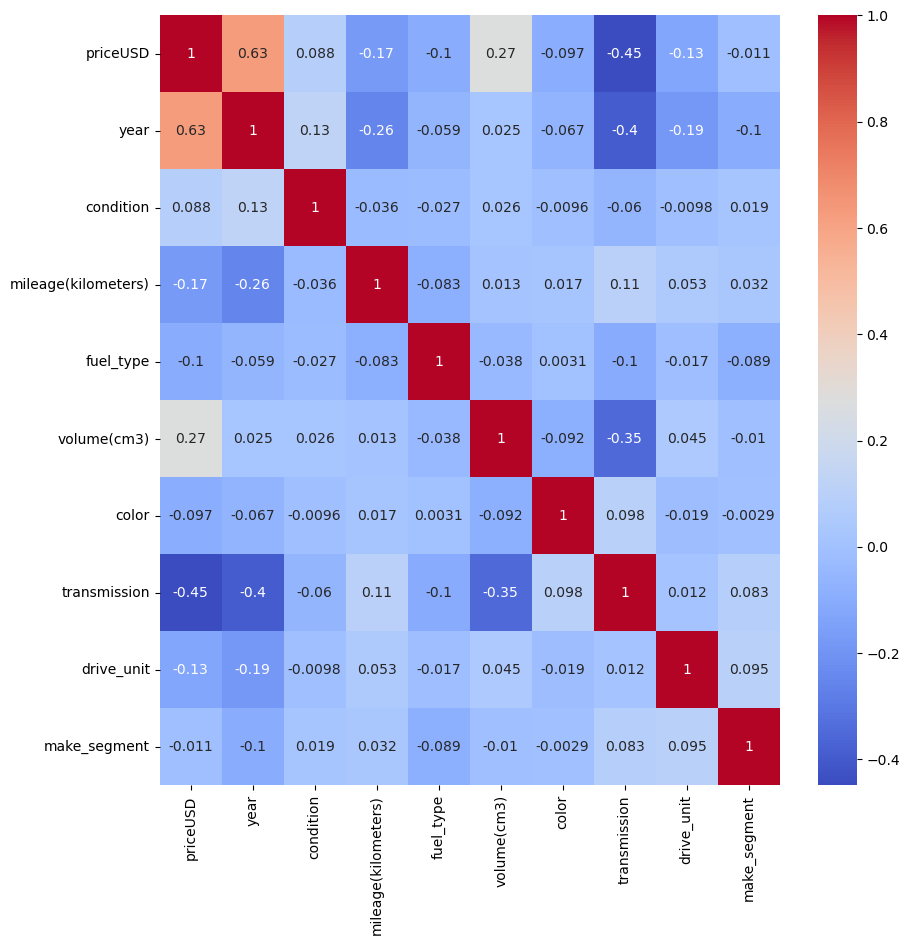

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Outlier Removal

In [48]:
# Using Z-score to remove outliers
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']
#removing outliers
df = df[(z < 3).all(axis=1)]

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']
                                                            
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

## Model Building

### Desicion Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

### Hypertuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
#parameters for grid search
params = {
 'max_depth': [2,4,6,8],
 'min_samples_split': [2,4,6,8],
 'min_samples_leaf': [1,2,3,4],
 'max_features': ['auto', 'sqrt', 'log2'],
 'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)
#fitting the grid search
grid.fit(X_train, y_train)
#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


C:\Users\MaestroCom\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MaestroCom\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MaestroCom\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\MaestroCom\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\MaestroCom

In [55]:
#decision tree regressor with best parameters
#dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4)
dtr = DecisionTreeRegressor(max_depth=8, max_features=None, min_samples_leaf=4)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4)

In [56]:
#training score
dtr.score(X_train, y_train)

0.8689232243678456

In [57]:
#predicting the test set
y_pred = dtr.predict(X_test)

## Model Evaluation

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8529954473045238
Mean Squared Error:  4704555.776616746
Mean Absolute Error:  1414.2804910704947
Root Mean Squared Error:  2168.9987959002524


## Feature Importance

In [60]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.754301
4,volume(cm3),0.200303
3,fuel_type,0.017333
6,transmission,0.010267
8,make_segment,0.009639
7,drive_unit,0.006993
2,mileage(kilometers),0.000872
5,color,0.000292
1,condition,0.000000


C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\2448103959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette = colors)
C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_6268\2448103959.py:7: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Feature', data=feat_df, palette = colors)


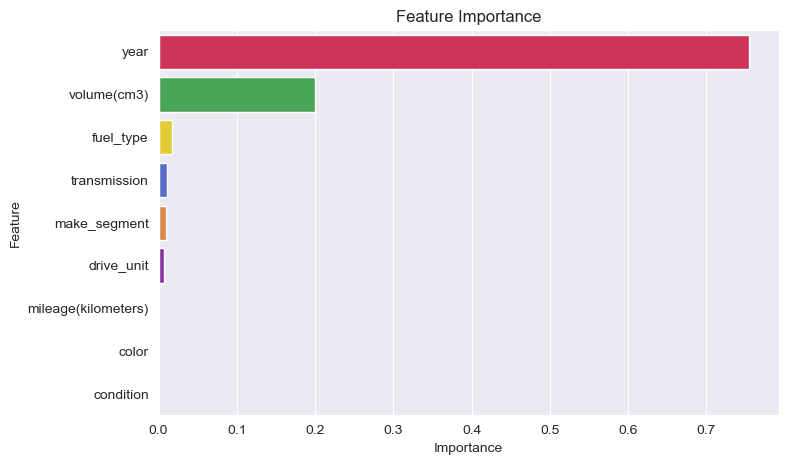

In [62]:
# Bar Plot

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4']

sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette = colors)
plt.title('Feature Importance')
plt.show()

## Conclusion
The aim of this project was to predict the price of the car in Belarus, by analyzing the car
features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color,
and segment. During the exploratory data analysis, it was found that there has been a
significant increase in car prices in Belarus after the year 2000. The cars which runs on
petrol have automatic transmission have higher price has compared to diesel cars with
manual transmission. However, the elctric cars are distinctively expensive than the other
cars. The cars with all wheel drive have the highest price among all the drive units. The
speciality segment cars have the highest price among all the segments followed by
luxury european, american, asian car segments.
The decision tree regressor model was used to predict the car price. The model was able
to predict the car price with 85.29% accuracy. The most important features for predicting
the car price were found to be year and volume of the engine.
